## CA0 - Filling the data gaps by predicting them with the help of statistical analysis
#### Mohammad Pooya Afshari 810198577
Filling data gaps through statistical analysis involves using available data to make predictions about missing values. In this task, pandas and mathplotlib were used to predict the salary of individuals based on their demographic and employment data. Specifically, statistical analysis was used to determine the mean and standard deviation of relevant features, which were then used to fill in missing values in the dataset. The resulting predictions can help to provide a more complete understanding of the demographics of individuals earning over 50k and below that threshold.

## Income estimation

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib

import numpy as np
import pandas as pd 
import os

You should consider upgrading via the 'C:\Users\user\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\user\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\user\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


## Question1

In [2]:
data = pd.read_csv('./train.csv')
display("info:",data.info(),"describe:",data.describe(),"head:",data.head(),"tail:",data.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29825 entries, 0 to 29824
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29825 non-null  int64 
 1   workclass       28154 non-null  object
 2   fnlwgt          29825 non-null  int64 
 3   education       29825 non-null  object
 4   education-num   29825 non-null  int64 
 5   marital-status  29825 non-null  object
 6   occupation      28149 non-null  object
 7   relationship    29825 non-null  object
 8   race            29825 non-null  object
 9   sex             29825 non-null  object
 10  capital-gain    29825 non-null  int64 
 11  capital-loss    29825 non-null  int64 
 12  hours-per-week  29825 non-null  int64 
 13  native-country  29288 non-null  object
 14  salary          29825 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.4+ MB


'info:'

None

'describe:'

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,29825.000000,2.982500e+04,29825.000000,29825.000000,29825.000000,29825.000000
mean,38.581425,1.897389e+05,10.079229,1094.586052,86.476513,40.434334
std,13.652005,1.053738e+05,2.571678,7485.908646,401.195078,12.308174
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178490e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.785170e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.368790e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


'head:'

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


'tail:'

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
29820,48,Local-gov,127921,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
29821,32,Private,42617,Some-college,10,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,30,United-States,<=50K
29822,47,Local-gov,191389,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,35,United-States,<=50K
29823,38,Private,187983,Prof-school,15,Married-civ-spouse,Sales,Wife,White,Female,0,0,40,United-States,<=50K
29824,18,Private,215110,HS-grad,9,Never-married,Handlers-cleaners,Own-child,Black,Male,0,0,40,United-States,<=50K


1. `info()`:  This method provides a concise summary of a DataFrame, including the column names, data types, and number of non-null values. It is a useful way to quickly check the data types and missing values in each column.
2. `describe()`: This method is used to generate descriptive statistics of a DataFrame or a Series. It provides information such as count, mean, standard deviation, minimum, maximum, and quartiles for each column. It is a quick way to get a summary of the distribution of numerical data.
3. `head()`: This method is used to display the first n rows of a DataFrame or a Series. By default, it displays the first 5 rows, but you can specify a different number of rows by passing an integer as an argument.
4. `tail()`:  This method is similar to head(), but it displays the last n rows of a DataFrame or a Series instead. By default, it displays the last 5 rows, but you can specify a different number of rows by passing an integer as an argument.

## Question2
we replace each category with a number for sake of better calculation {"Male":0 , "Female":1}

In [24]:
dataCopy = data.copy(deep=True)
display("Info",dataCopy.info())

mappedValuesOfsex = {
    "Male":0,
    "Female":1
}
mappedValuesOfrace = {
    "White":0,
    "Black":1,
}
mappedValuesOfrelationship = {
    "Not-in-family":0,
    "Husband":1,
    "Wife":2,
    "Own-child":3,
    "Unmarried":4
}

dataCopy["sex"]=dataCopy["sex"].map(mappedValuesOfsex)
dataCopy["race"]=dataCopy["race"].map(mappedValuesOfrace)
dataCopy["relationship"]=dataCopy["relationship"].map(mappedValuesOfrelationship)
dataCopy["workclass"]=dataCopy["workclass"].astype('category').cat.codes
dataCopy["education"]=dataCopy["education"].astype('category').cat.codes
dataCopy["marital-status"]=dataCopy["marital-status"].astype('category').cat.codes
dataCopy["occupation"]=dataCopy["occupation"].astype('category').cat.codes
dataCopy["native-country"]=dataCopy["native-country"].astype('category').cat.codes

display("mappedInfo", dataCopy.info(), dataCopy.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29825 entries, 0 to 29824
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29825 non-null  int64 
 1   workclass       28154 non-null  object
 2   fnlwgt          29825 non-null  int64 
 3   education       29825 non-null  object
 4   education-num   29825 non-null  int64 
 5   marital-status  29825 non-null  object
 6   occupation      28149 non-null  object
 7   relationship    29825 non-null  object
 8   race            29825 non-null  object
 9   sex             29825 non-null  object
 10  capital-gain    29825 non-null  int64 
 11  capital-loss    29825 non-null  int64 
 12  hours-per-week  29825 non-null  int64 
 13  native-country  29288 non-null  object
 14  salary          29825 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.4+ MB


'Info'

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29825 entries, 0 to 29824
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             29825 non-null  int64  
 1   workclass       29825 non-null  int8   
 2   fnlwgt          29825 non-null  int64  
 3   education       29825 non-null  int8   
 4   education-num   29825 non-null  int64  
 5   marital-status  29825 non-null  int8   
 6   occupation      29825 non-null  int8   
 7   relationship    28921 non-null  float64
 8   race            28340 non-null  float64
 9   sex             29825 non-null  int64  
 10  capital-gain    29825 non-null  int64  
 11  capital-loss    29825 non-null  int64  
 12  hours-per-week  29825 non-null  int64  
 13  native-country  29825 non-null  int8   
 14  salary          29825 non-null  object 
dtypes: float64(2), int64(7), int8(5), object(1)
memory usage: 2.4+ MB


'mappedInfo'

None

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,6,77516,9,13,4,0,0.0,0.0,0,2174,0,40,38,<=50K
1,50,5,83311,9,13,2,3,1.0,0.0,0,0,0,13,38,<=50K
2,38,3,215646,11,9,0,5,0.0,0.0,0,0,0,40,38,<=50K
3,53,3,234721,1,7,2,5,1.0,1.0,0,0,0,40,38,<=50K
4,28,3,338409,9,13,2,9,2.0,1.0,1,0,0,40,4,<=50K


## Question3
Filling cells with the average value is a common method of imputing missing data in a DataFrame. This method has some advantages and disadvantages, which are outlined below:
### Advantages:

1. Simple and easy to implement: Filling missing values with the average is a simple method that can be easily applied to any DataFrame.
2. Preserves the distribution of the data: Filling missing values with the mean can help preserve the distribution of the data, as the average value is a representative value that is similar to the other values in the dataset.
3. Can improve model performance: Filling missing values with the mean can sometimes improve the performance of a predictive model, especially if the missing values are randomly distributed and not dependent on other variables.

### Disadvantages:
1. Can distort the distribution of the data: Filling missing values with the mean can sometimes distort the distribution of the data, especially if the missing values are not randomly distributed. This can result in biased estimates and inaccurate predictions.
2. Can increase the variance of the data: Filling missing values with the mean can sometimes increase the variance of the data, which can make it more difficult to detect patterns and relationships in the data.
3. Ignores other information: Filling missing values with the mean ignores other information that may be available in the dataset. For example, if missing values are related to a particular group or time period, filling them with the mean may not be appropriate.
4. May not be suitable for categorical variables: Filling missing values with the mean may not be appropriate for categorical variables, as there is no meaningful average value for these types of variables.


In summary, filling cells with the average value is a simple and easy-to-implement method for dealing with missing data, but it has some drawbacks and should be used with caution. It is important to consider the nature of the missing data and the characteristics of the dataset before deciding on an imputation method.

In [4]:
display("Total NaN values of each column ",data.isna().sum())

'Total NaN values of each column '

age                  0
workclass         1671
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1676
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     537
salary               0
dtype: int64

In [5]:
numerics = data.select_dtypes('number')
objects = data.select_dtypes('object');

noNanData = data.copy()
noNanData[numerics.columns] = numerics.fillna(numerics.mean())
noNanData[objects.columns] = objects.fillna(objects.mode().iloc[0])
noNanData.isna().sum()


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

## Question4
We remove columns which have `unique()` values and call new dataFrame train dataFrame.

In [6]:
# Get the number of unique values in each column
unique_counts = noNanData.nunique()

# Select columns with more than one unique value
to_keep = unique_counts[unique_counts > 1].index
# Create a new DataFrame with the selected columns
trainDF = noNanData[to_keep]


## Question5
In this question we clear number of males and femalesin dataset

In [7]:
male=(trainDF['sex']=='Male').sum()
female=(trainDF['sex']=='Female').sum()
display("num of males:",male)
display("num of females:",female)

'num of males:'

19956

'num of females:'

9869

Then we state number of married males in the dataset

In [8]:
Hmale = (trainDF['sex'] == 'Male') & (trainDF['relationship'] == 'Husband')
Hmale_count = Hmale.sum()
display("num of husbands:",Hmale_count)

'num of husbands:'

12056

## Question6

In [9]:
BPOTP = (trainDF['race'] == 'Black') & (trainDF['age'] > 30) & (trainDF['workclass'] == 'Private')
BPOTP_count = BPOTP.sum()
display("num of black people over thirty years old who work privately:", BPOTP_count)

'num of black people over thirty years old who work privately:'

1373

## Question7
vectorization is a technique that can improve the efficiency and performance of code by operating on entire arrays or dataframes at once, rather than processing each element one at a time

In [10]:
import time

In [11]:
trainDF.where((trainDF['education']=='Bachelors'))['hours-per-week'].mean()

42.546669366268475

In [12]:
start = time.time()
blahAns=trainDF.where((trainDF['education']=='Bachelors'))['hours-per-week'].mean()
print("Verctorize took %s seconds" % (time.time() - start))

Verctorize took 0.023504257202148438 seconds


## Question8
 Calculating Mean Using For Loop

In [13]:
def mean_with_condition(dataset, condition, selector):
    count = 0
    total = 0
    
    for i, row in data.iterrows():
        if condition(row):
            count += 1
            total += selector(row)
    #in case no rows were matched to scape ZeroDivideException
    if count == 0:
        return 0
    
    return total / count


In [14]:
mean_with_condition(trainDF, lambda i: i['education'] =='Bachelors',lambda i: i['hours-per-week'] )

42.546669366268475

In [15]:
start = time.time()
blahAns=mean_with_condition(trainDF, lambda i: i['education'] =='Bachelors',lambda i: i['hours-per-week'] )
print("Loop took %s seconds" % (time.time() - start))

Loop took 0.9982388019561768 seconds


Note that this function works by iterating over the rows of the dataset and selecting the relevant data based on the condition and selector provided. While this approach can be useful for small datasets or for prototyping, it can be slower and less efficient than vectorized operations that take advantage of the speed and power of NumPy and Pandas.

 For loop which took :  0.9887855052947998 seconds vs Verctorize which took: 0.021276235580444336 seconds


### Result
---

Calculated means are the same, but vectorization took less time to calculate the result. Because it uses parallel calculation and more of resourse capabilities

---

## Question9
Showing the distribution shape of each column of data on the graph using `hist` function of the pandas

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'education-num'}>,
        <AxesSubplot:title={'center':'capital-gain'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>]], dtype=object)

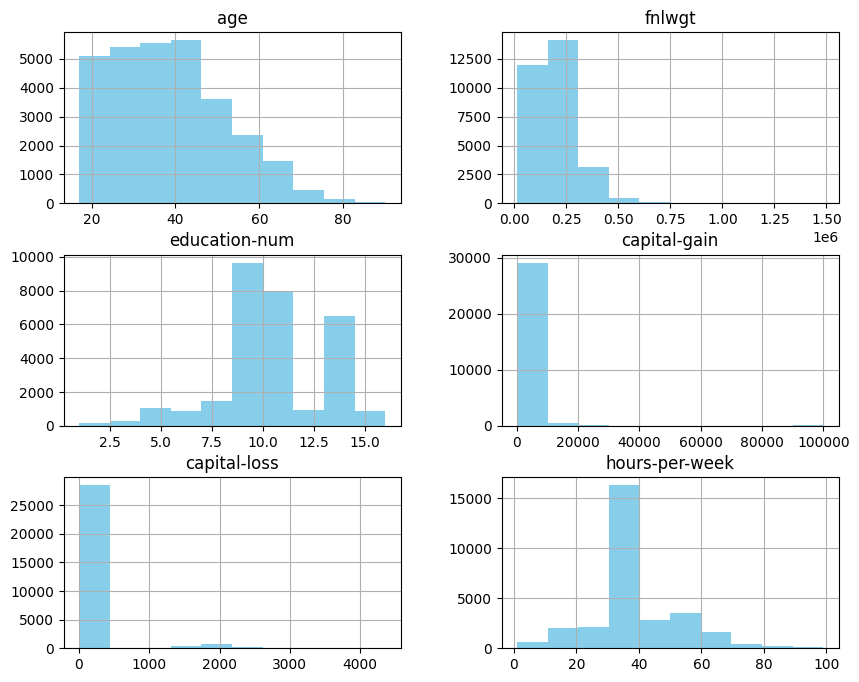

In [16]:
trainDF.hist(figsize=(10, 8), color = "skyblue", lw=0)

## Question10

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'education-num'}>,
        <AxesSubplot:title={'center':'capital-gain'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>]], dtype=object)

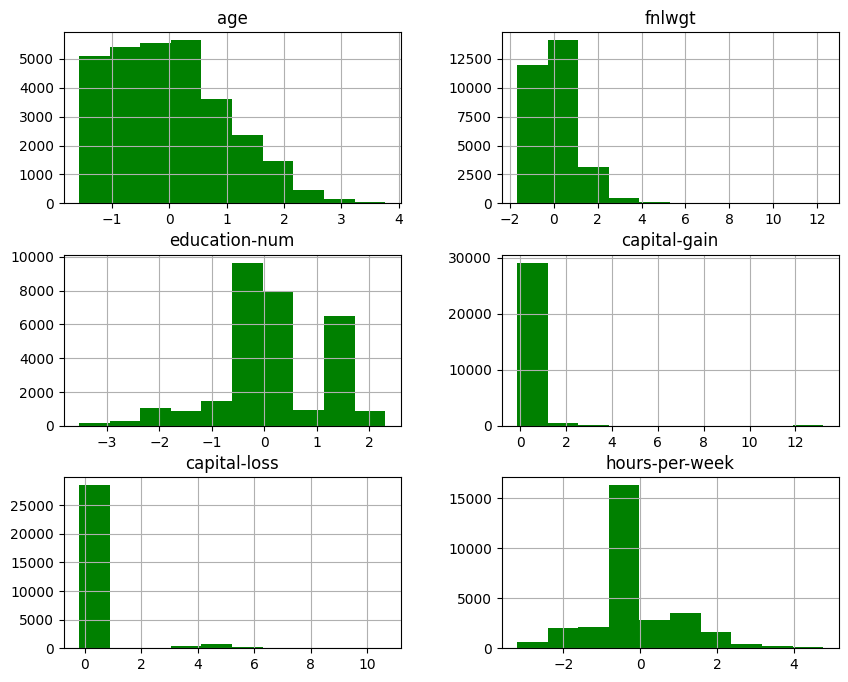

In [17]:
df = trainDF.select_dtypes("number")
allMean = df.mean()
allSTD = df.std()
normalizedDF = (df-allMean)/allSTD
normalizedDF.hist(figsize=(10, 8), color = "green", lw=0)

## Question11

In [18]:
import matplotlib.pyplot as plt
from scipy.stats import norm

C:\Users\user\AppData\Local\Temp\ipykernel_10044\4215529746.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std1,mean1=greater_than_50k.std(),greater_than_50k.mean()
C:\Users\user\AppData\Local\Temp\ipykernel_10044\4215529746.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std2,mean2=less_than_or_equal_50k.std(),less_than_or_equal_50k.mean()


age               0.771200
fnlwgt            0.969330
education-num     0.931544
capital-gain      1.976087
capital-loss      1.473212
hours-per-week    0.887465
dtype: float64

age               1.027893
fnlwgt            1.009455
education-num     0.946097
capital-gain      0.131465
capital-loss      0.776095
hours-per-week    0.999179
dtype: float64

age               0.414559
fnlwgt           -0.015702
education-num     0.594376
capital-gain      0.399265
capital-loss      0.261746
hours-per-week    0.406811
dtype: float64

age              -0.130817
fnlwgt            0.004955
education-num    -0.187560
capital-gain     -0.125991
capital-loss     -0.082596
hours-per-week   -0.128372
dtype: float64

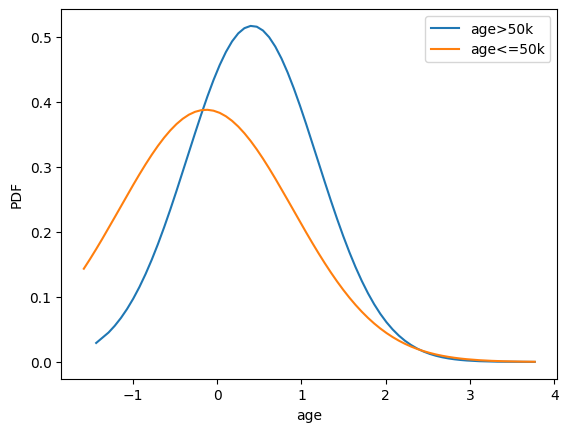

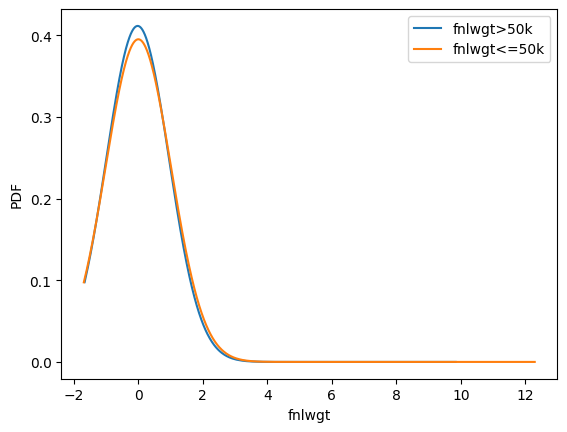

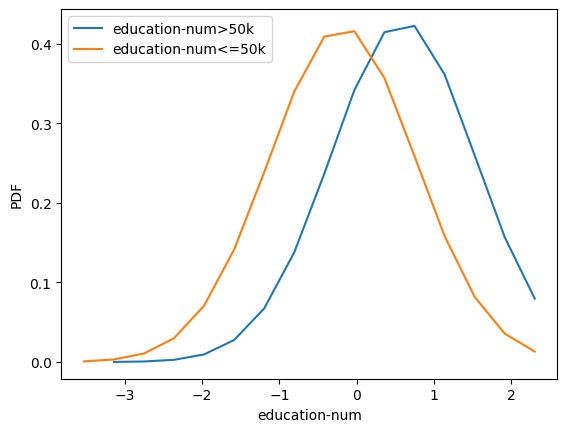

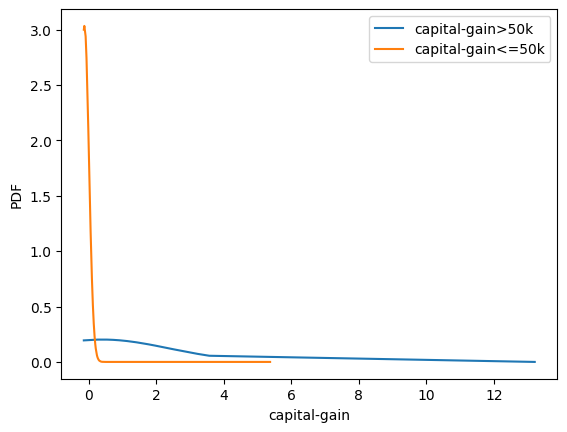

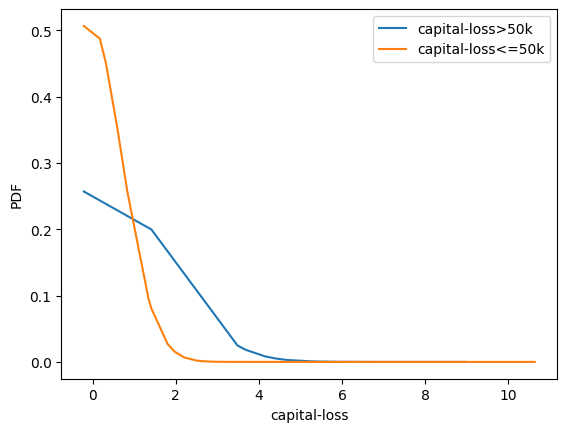

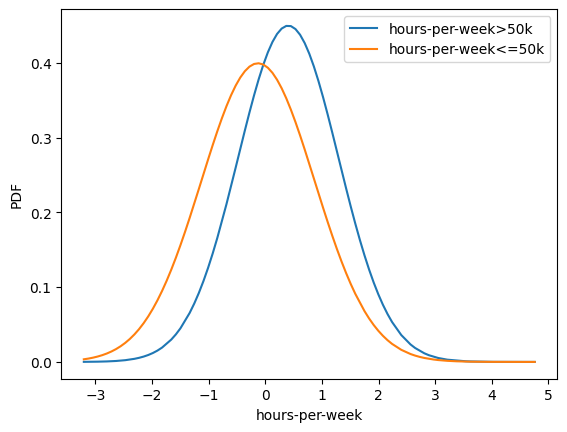

In [19]:

trainDF=trainDF[trainDF["salary"].notna()]
indexes=['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
numericalDF=trainDF[indexes]
originData=trainDF[indexes]
normalizedDF=(numericalDF-originData.mean())/originData.std()
normalizedDF['salary']=trainDF['salary']
# Split the dataset into two groups based on salary
greater_than_50k = normalizedDF[normalizedDF['salary'] == '>50K']
less_than_or_equal_50k = normalizedDF[normalizedDF['salary'] == '<=50K']
std1,mean1=greater_than_50k.std(),greater_than_50k.mean()
std2,mean2=less_than_or_equal_50k.std(),less_than_or_equal_50k.mean()
display(std1,std2,mean1,mean2)

# Plot the PDF probability density function of the normal distribution
for col in normalizedDF.columns:
    if col!= "salary":
        plt.plot(greater_than_50k[col].sort_values(), norm(mean1[col], std1[col]).pdf(greater_than_50k[col].sort_values()), label=col + ">50k")
        plt.plot(less_than_or_equal_50k[col].sort_values(), norm(mean2[col], std2[col]).pdf(less_than_or_equal_50k[col].sort_values()), label=col + "<=50k")

        plt.xlabel(col)
        plt.ylabel('PDF')
        plt.legend(loc='best')
        plt.show()

<p dir="rtl" style="text-align:right">
با توجه به نمودار های حاصل شده چون فاصله ی بین نمودار های capital-gain و capital-loss بیشتر است میتواند به عنوان مدل ورودی بهتر باشد که برای حل بخش بعد ما از سود سرمایه استفاده کرده ایم
<br />
ستون هایی که توزیع یکسان و شبیه به هم دارند برای ورودی مدل بخوبی عمل نمی کنند.
<br />
همچنین در تحلیل نمودار ها مقادیر چپ تقاطع مقادیر کمتر از 50 هزار و بعد از ان مقادیر بیشتر از این مقدار است
<br />
مقدار تقریبی محل تقاطع 0.3 برآورد شده
</p>

## Question12

In [20]:
indexes=['capital-gain']
# Load test data
testDF = pd.read_csv('test.csv')
normalizedTestDF=(testDF['capital-gain']-testDF['capital-gain'].mean())/testDF['capital-gain'].std()
normalizedTestDF=normalizedTestDF.apply(lambda x:'>50k' if x>0.5 else '<=50k')

testDF['salary']=normalizedTestDF
display(testDF.head(15))
testDF.to_csv("output.csv")

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,230292,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50k
1,36,Private,90159,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,32,United-States,<=50k
2,40,Private,175398,Assoc-voc,11,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,20,United-States,<=50k
3,56,Self-emp-not-inc,53366,11th,7,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,20,United-States,<=50k
4,50,Private,46155,Assoc-voc,11,Divorced,Prof-specialty,Unmarried,White,Female,0,0,40,United-States,<=50k
5,55,Private,61708,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,6418,0,50,United-States,>50k
6,32,Local-gov,112650,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,<=50k
7,41,Private,173682,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,43,United-States,<=50k
8,28,Private,160981,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,52,United-States,<=50k
9,53,Private,72257,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,55,United-States,<=50k
